In [1]:
cd /g/data/jk72/deg581/shacom/ana/notebooks

/g/data/jk72/deg581/shacom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/107510914.gadi-pbs'

In [3]:
# Suite for Analysis - Overview

# script needs to:
# load 1-5 variables from multiple files
# run some calculation and concatenate together
# make some plots

In [5]:


FilePath='/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/' # Truth file settings
prefix='roms_his_'
timeRange = [6, 8]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0006.nc', '/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0007.nc']
22.56314984 G


In [6]:
ds = ds.drop_vars(['u','v','Tb','Sb','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr'])
print(ds.nbytes/1e9,'G')
ds

13.6002624 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 25, s_w: 26, eta_rho: 195,
                    xi_rho: 188, eta_u: 195, xi_u: 187, eta_v: 194, xi_v: 188,
                    eta_psi: 194, xi_psi: 187, ocean_time: 730)
Coordinates:
  * s_rho          (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w            (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2012-01-01 ... 2013-12-30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/77)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
    u_eastward     (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    v_northward    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Sunday - December 24, 2023 -  ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [7]:
ds

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 25, s_w: 26, eta_rho: 195,
                    xi_rho: 188, eta_u: 195, xi_u: 187, eta_v: 194, xi_v: 188,
                    eta_psi: 194, xi_psi: 187, ocean_time: 730)
Coordinates:
  * s_rho          (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w            (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2012-01-01 ... 2013-12-30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/77)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
    u_eastward     (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    v_northward    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Sunday - December 24, 2023 -  ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [8]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
grd = xr.open_dataset('/g/data/jk72/deg581/shackleton-setup/data/proc/shac_2km_v1_grd.nc')
ds['x_rho'] = grd.x_rho
ds['y_rho'] = grd.y_rho

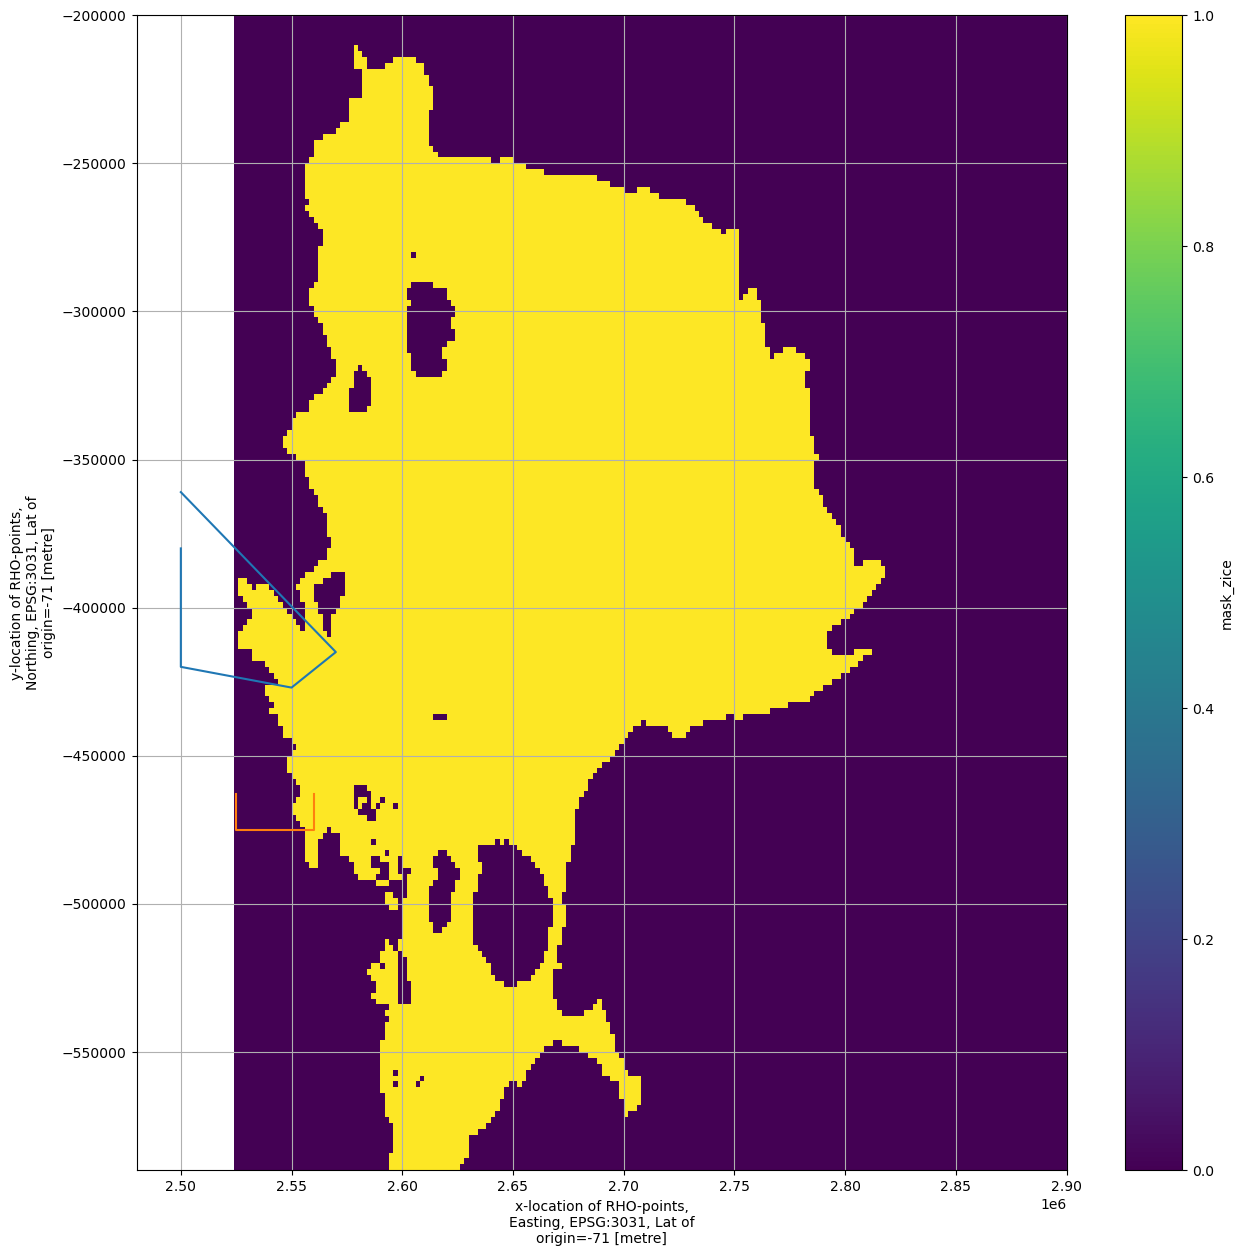

In [9]:
# make masks
ds['mask_zice'] = ((ds.zice<0)*ds.mask_rho)

# now make a ROI mask(s)
plt.figure(figsize=(15,15))
ds.mask_zice.plot(x='x_rho',y='y_rho')
plt.grid()
poly_shelf1 = np.array([
     [2.5e6,-380000],
     [2.5e6,-420000],
     [2.55e6,-427000],
     [2.57e6,-415000],
     [2.5e6,-361000]]) # denman glacier ice shelf
plt.plot(poly_shelf1[:,0],poly_shelf1[:,1])
poly_shelf2 = np.array([
     [2.525e6,-463000],
     [2.525e6,-475000],
     [2.56e6,-475000],
     [2.56e6,-463000]]) # scott glacier ice shelf
plt.plot(poly_shelf2[:,0],poly_shelf2[:,1])
plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi1 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf1[:,0], poly_shelf1[:,1])
mask_roi2 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf2[:,0], poly_shelf2[:,1])

roi_label1 = 'denman'
roi_label2 = 'scott'
ds['mask_zice_roi1'] = ds.mask_zice*mask_roi1
ds.mask_zice_roi1.attrs['long_name']=roi_label1
ds['mask_zice_roi2'] = ds.mask_zice*mask_roi2
ds.mask_zice_roi2.attrs['long_name']=roi_label2

# ds.mask_zice_roi.plot()

In [10]:
# set any grid data here.

weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta
    
ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
ds["z_rho0"] = ds.z_rho0.fillna(0)

ds['dz'] = (('ocean_time','s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=1))



making vertical coordinates


In [11]:
# make monthly and seasonal weights etc
# first monthyl

# calculate the month length for each value
month_length = ds.ocean_time.dt.days_in_month


## Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("ocean_time.season") / month_length.groupby("ocean_time.season").sum()
)

## Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("ocean_time.season").sum().values, np.ones(4))

# ## Calculate the weighted average
# ds_temp_weighted = (ds.temp * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_salt_weighted = (ds.salt * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_u_weighted = (ds.u_eastward * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_v_weighted = (ds.v_northward * weights).groupby("ocean_time.season").sum(dim="ocean_time")

# now make a daily climatology

ds_dailyclima = ds.groupby('ocean_time.dayofyear').mean()


# melt rates

In [12]:
# implement the missing value
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)

ds_dailyclima['m'] = ds_dailyclima.m.where(ds_dailyclima.m<1e35,np.NaN)
ds_dailyclima['my'] = ds_dailyclima.m*(60*60*24*365)

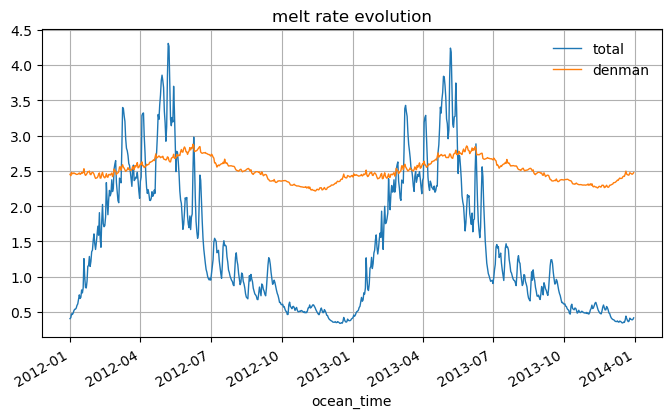

In [14]:
# time evolution of melt rate
plt.figure(figsize=(8,4))
(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='total')
(ds.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='denman')
plt.legend(frameon=False)
plt.title('melt rate evolution')
plt.grid()
plt.show()


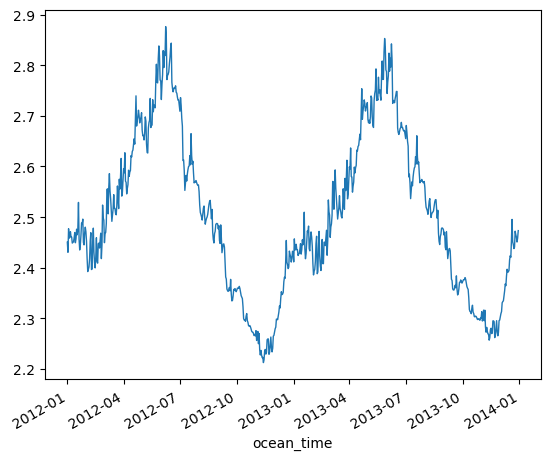

In [15]:
(ds.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='denman')

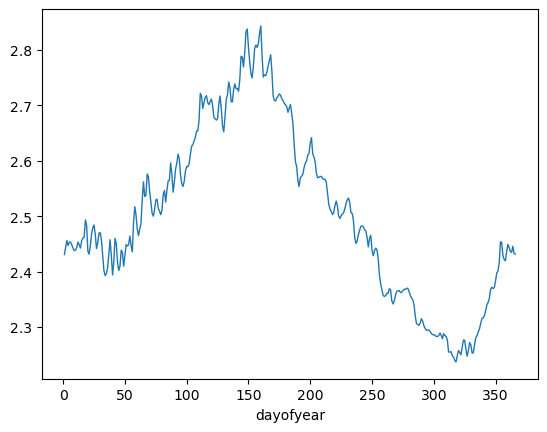

In [16]:
(ds_dailyclima.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).mean(dim='ocean_time').plot(linewidth=1,label='roi')

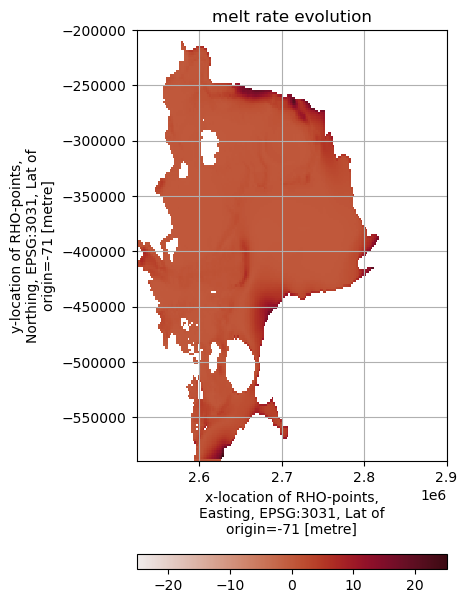

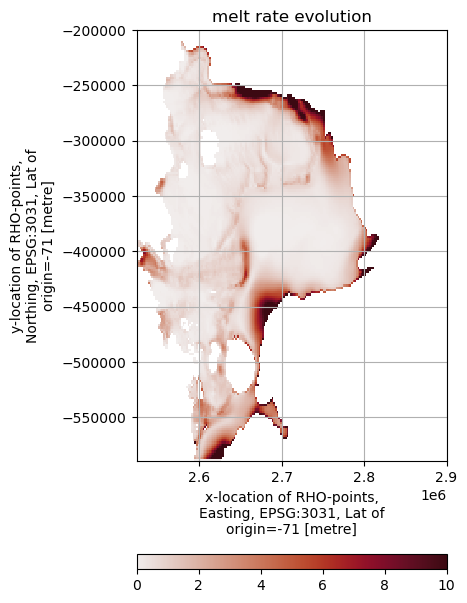

In [17]:
plt.figure(figsize=(4,8))
im=(ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(x='x_rho',y='y_rho',cmap='cmo.amp',add_colorbar=False)
plt.title('melt rate evolution')
plt.colorbar(im,orientation='horizontal')
plt.grid()
plt.show()

plt.figure(figsize=(4,8))
im=(ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(x='x_rho',y='y_rho',cmap='cmo.amp',add_colorbar=False,vmin=0,vmax=10)
# plt.axis((2.4e6,2.427e6,-912500,-887500))
plt.title('melt rate evolution')
plt.colorbar(im,orientation='horizontal')
plt.grid()
plt.show()

In [ ]:
STOP

# ocean heat content

In [ ]:
# plot heat content
#OHC = rho0*cp0*dV*dT
dV = (1/ds.pm)*(1/ds.pn)*ds.dz.mean(dim='ocean_time')
rho0=1026
cp0=4181.3
OHC=1026*4181.3*dV*(ds.temp+273.15)


In [ ]:
# plot total OHC
TotalOHC = OHC.sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC.plot()
plt.title('Total OHC')
plt.grid()
plt.show()
TotalOHC_above1000 = OHC.where((ds.z_rho0>-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_above1000.plot()
plt.title('Total OHC (above 1000m)')
plt.grid()
plt.show()
TotalOHC_below1000 = OHC.where((ds.z_rho0<-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_below1000.plot()
plt.title('Total OHC (below 1000m)')
plt.grid()

In [ ]:
# plot under ice OHC

TotalOHC_subIce = OHC.where(ds.mask_zice.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_subIce.plot()
plt.title('Total OHC (below ice shelf)')
plt.grid()
TotalOHC_subIce_roi = OHC.where(ds.mask_zice_roi.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_subIce_roi.plot()
plt.title('Total OHC (below roi)')
plt.grid()
